# Analytics of the Bugcrowd programs

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import io 

In [36]:
# df_old = pd.read_csv("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/BugCrowd-Program-V3.csv")
df = pd.read_excel("/Users/patrickahrend/Developer/data-analytics-bugcrowd/used_data/07.01withdiscovery.xlsx")

## Data cleaning 


In [37]:
df.dtypes

Reward Range                 object
Link                         object
Title                        object
Short Description            object
Is Safe Harbor               object
Vulnearbilities Rewarded    float64
Validation Within            object
Average Payout               object
Hall of Famers               object
Number People                object
P4                           object
P3                           object
P2                           object
P1                           object
Maximum Reword               object
programm_ruels               object
annocument_count            float64
Featured                     object
Industry                     object
Technology                   object
dtype: object

In [38]:
df.drop(['Link','programm_ruels','Short Description'], axis=1, inplace=True)

In [39]:
df.columns

Index(['Reward Range', 'Title', 'Is Safe Harbor', 'Vulnearbilities Rewarded',
       'Validation Within', 'Average Payout', 'Hall of Famers',
       'Number People', 'P4', 'P3', 'P2', 'P1', 'Maximum Reword',
       'annocument_count', 'Featured', 'Industry', 'Technology'],
      dtype='object')

In [40]:
df.describe

<bound method NDFrame.describe of        Reward Range                                              Title  \
0     $100 - $6,500    Transactional email service made for developers   
1    $300 - $30,000                                          1Password   
2               NaN                 ANZ Responsible Disclosure Program   
3               NaN  AMEX - Global Business Travel Vulnerability Di...   
4     $250 - $5,000                                         20 Minuten   
..              ...                                                ...   
325             NaN   Macquarie Group Vulnerability Disclosure Program   
326             NaN   Comcast Xfinity Vulnerability Disclosure Program   
327             NaN  Inter-American Foundation - Vulnerability Disc...   
328             NaN                     The leader in transport fuels.   
329             NaN                            ThousandEyes Bug Bounty   

          Is Safe Harbor  Vulnearbilities Rewarded Validation Within  \
0    

In [41]:
df['Reward Range'] = df['Reward Range'].str.replace('$', '').str.replace('Points', '0').str.p
df['Reward Range'] = df['Reward Range'].fillna(0)


/var/folders/p8/j40fdn353n30l2nvsd_70qgc0000gn/T/ipykernel_20043/2298797878.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Reward Range'] = df['Reward Range'].str.replace('$', '').str.replace('Points', '0')


In [42]:
for i in df["Reward Range"]:
    print(i)

100 - 6,500
300 - 30,000
0
0
250 - 5,000
150 - 2,500
0 - 2,500
200 - 3,500
0 - 5,000
100 - 1,500
100 - 7,000
0
0
100 - 6,000
0
0
250 - 2,500
300 - 6,500
100 - 1,500
200 - 10,000
100 - 3,000
200 - 4,500
150 - 10,000
50 - 2,500
150 - 4,000
500 - 20,000
50 - 2,500
50 - 10,000
200 - 10,000
0
100 - 15,000
200 - 5,000
100 - 1,500
0
0 - 2,000
0
0 - 4,500
150 - 2,500
100 - 4,500
300 - 10,000
200 - 25,000
200 - 12,000
0
0
0
100 - 5,000
150 - 5,000
100 - 10,000
150 - 8,000
0
200 - 4,500
250 - 10,000
100 - 10,000
0 - 2,100
0 - 2,500
200 - 6,500
200 - 4,500
0 - 4,000
50 - 4,000
0 - 2,500
100 - 5,000
200 - 10,000
200 - 4,500
0
0 - 2,000
150 - 10,000
0
0
100 - 1,500
100 - 5,000
75 - 1,250
0
50 - 2,500
200 - 5,000
0
0
0
0
300 - 10,000
0
0
150 - 2,500
75 - 1,250
0
250 - 3,000
100 - 5,000
0
100 - 2,250
100 - 10,000
0
200 - 12,000
0 - 4,000
0
100 - 10,000
150 - 2,500
0 - 100,000
0
0
0
100 - 6,000
150 - 2,500
25 - 600
0
200 - 6,000
100 - 3,500
0
150 - 5,000
150 - 4,000
150 - 2,500
0
0
0
0
200 - 4,000
0
0

In [50]:
df["Reward Range"] = df["Reward Range"].astype(str)

In [51]:
## calculate the average of the column Reward Range
def avg_range(r):
    if r == '0':
        return None
    min_max = r.split("-")
    min_value = int(min_max[0].replace(",",""))
    max_value = int(min_max[1].replace(",",""))
    return (min_value + max_value) / 2

In [54]:
df['Reward Range Average'] = df['Reward Range'].apply(avg_range)


In [59]:
df['Reward Range average']

0       3300.0
1      15150.0
2          NaN
3          NaN
4       2625.0
        ...   
325        NaN
326        NaN
327        NaN
328        NaN
329        NaN
Name: Reward Range average, Length: 330, dtype: float64

In [60]:
# Apply the to_hours() function to the "Validation Within" column
df["Validation Within"].apply(lambda x: str(x))
df["Validation Within"] = df["Validation Within"].fillna(value="N/A")
df["Validation Within"].apply(lambda x: str(x))

0         N/A
1      4 days
2      8 days
3         N/A
4      4 days
        ...  
325       N/A
326       N/A
327       N/A
328       N/A
329       N/A
Name: Validation Within, Length: 330, dtype: object

In [65]:
df["Validation Within"] = df["Validation Within"].astype(str)
df["Validation Within"].apply(lambda x: str(x))

0         N/A
1      4 days
2      8 days
3         N/A
4      4 days
        ...  
325       N/A
326       N/A
327       N/A
328       N/A
329       N/A
Name: Validation Within, Length: 330, dtype: object

In [66]:
df["Validation Within"]

0         N/A
1      4 days
2      8 days
3         N/A
4      4 days
        ...  
325       N/A
326       N/A
327       N/A
328       N/A
329       N/A
Name: Validation Within, Length: 330, dtype: object

In [68]:
import re
from datetime import timedelta

def to_hours(s):
    s = str(s)
    if pd.isnull(s):
        # If the input is NaN, return NaN
        return pd.np.nan
    elif s == "":
        return pd.np.nan
    else:
        # Extract the numerical value and the unit of time from the string
        m = re.match(r'(\d+) (days|hours|weeks|months)', s)
        if not m:
            # If the input is not in the expected format, check if it starts with "about"
            if s.startswith("about "):
                # If it does, remove the "about" prefix and try again
                s = s[6:]
                m = re.match(r'(\d+) (days|hours|weeks|months)', s)
            
            if not m:
                print(f"Error: Invalid input: {s}")
                return pd.np.nan
        value, unit = m.groups()

        # Convert the value to a float and the unit to lowercase
        value = float(value)
        unit = unit.lower()

        # Convert the value to hours
        if unit == 'days':
            value *= 24
        elif unit == 'hours':
            pass
        elif unit == 'weeks':
            value *= 7 * 24
        elif unit == 'months':
            # Estimate the number of hours in a month based on 30 days
            value *= 30 * 24
        else:
            print(f"Error: Invalid unit: {unit}")
            raise ValueError(f"Invalid unit: {unit}")
    
    return value



df["Validation Within Hours"] = df["Validation Within"].apply(to_hours)


Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: 1 day
Error: Invalid input: 1 day
Error: Invalid input: 1 day
Error: Invalid input: N/A
Error: Invalid input: 1 day
Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: 1 month
Error: Invalid input: 1 day
Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: N/A
Error: Invalid input: 1 day
Error: Invalid input: 1 day
Error: Invalid input: 1 day
Error: Invalid input: N/A
Error: Invalid input: 1 day
Error: Invalid i

/var/folders/p8/j40fdn353n30l2nvsd_70qgc0000gn/T/ipykernel_20043/390435476.py:23: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  return pd.np.nan


In [71]:
df["Average Payout"] = df["Average Payout"].str.replace('$', '').str.replace(",","")
df["Average Payout"] = df["Average Payout"].fillna("0")
df["Average Payout"] = df["Average Payout"].astype(float)

/var/folders/p8/j40fdn353n30l2nvsd_70qgc0000gn/T/ipykernel_20043/2961492079.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Average Payout"] = df["Average Payout"].str.replace('$', '').str.replace(",","")


In [72]:
df["Number People"]= df["Number People"].str.replace("total","")
df["Number People"]= df["Number People"].fillna("0")
df["Number People"]= df["Number People"].astype(int)

In [73]:
for i in df["Number People"]:
    print(i)

0
783
12
294
586
0
545
1144
336
0
178
16
410
1310
190
236
437
976
0
2603
93
0
0
0
361
0
243
0
2403
695
1846
34
49
89
1162
122
290
114
0
2822
158
222
24
105
35
43
1308
924
289
530
1287
26
1082
0
79
0
0
1514
998
354
566
0
0
756
171
19
40
104
62
1070
210
313
680
104
301
141
188
129
0
94
46
0
213
21
509
0
145
0
168
45
574
453
27
1576
511
260
247
23
38
460
0
555
0
209
0
176
0
0
105
34
54
0
2474
44
805
188
24
120
43
34
0
1061
1338
0
4
137
1220
237
1181
3852
0
1006
611
307
98
323
454
925
185
284
0
0
1524
47
154
182
140
41
142
777
191
574
1724
61
58
0
74
96
95
95
331
266
897
0
259
264
1210
597
110
118
730
31
79
4742
124
142
104
0
0
31
67
4
0
36
594
21
3
14
15
59
42
708
46
35
21
59
33
787
194
633
655
681
229
60
0
860
0
0
0
0
0
0
397
371
156
194
2432
453
677
0
25
23
179
50
431
29
290
598
252
1691
143
53
181
0
643
2340
56
275
55
154
0
0
168
52
183
50
1369
0
168
407
251
98
0
1961
1373
397
0
0
82
558
708
106
833
0
21
1050
1378
95
112
100
0
1980
354
0
1042
0
66
0
3004
87
390
182
0
0
0
964
2282
2194


In [74]:
df["Hall of Famers"] = df["Hall of Famers"].fillna("0")
df["Hall of Famers"] = df["Hall of Famers"].str.replace("View all ","").str.replace("View the hall","0")
df["Hall of Famers"] = df["Hall of Famers"].astype(int)

In [17]:
def cleanse_priority(row):
    row = row.fillna("0")
    row = row.str.replace("$","")
    return row 

In [75]:
df["P1"] = cleanse_priority(df["P1"])
df["P2"] = cleanse_priority(df["P2"])
df["P3"] = cleanse_priority(df["P3"])
df["P4"] = cleanse_priority(df["P4"])

/var/folders/p8/j40fdn353n30l2nvsd_70qgc0000gn/T/ipykernel_20043/631052674.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  row = row.str.replace("$","")


In [78]:
df["Maximum Reword"] = cleanse_priority(df["Maximum Reword"])

/var/folders/p8/j40fdn353n30l2nvsd_70qgc0000gn/T/ipykernel_20043/631052674.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  row = row.str.replace("$","")


In [80]:
df["annocument_count"] = df["annocument_count"].fillna("0")

In [79]:
df.to_excel('looking.xlsx', index=False)

### To change the category variables to numeric variables, we are using one-hot encoding 


In [19]:
df.to_excel('/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/bugcrowd_modified_24.12.xlsx', index=False)

# Plotting

In [20]:
df = pd.read_excel("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/bugcrowd_modified_24.12.xlsx")

In [21]:
df.columns

Index(['Reward Range', 'Link', 'Title', 'Short Description', 'Is Safe Harbor',
       'Vulnearbilities Rewarded', 'Validation Within', 'Average Payout',
       'Hall of Famers', 'Number People', 'P4', 'P3', 'P2', 'P1',
       'Maximum Reword', 'programm_ruels', 'annocument_count', 'Featured',
       'Industry', 'Technology'],
      dtype='object')

In [22]:
def plot_histogram(df, column, x_postfix,n):
    # Create a histogram of the specified column
    sns.histplot(df[column], bins=30)
    plt.xlim(0, None)

    # Add labels to the plot
    plt.xlabel(column+ " " + x_postfix)
    plt.ylabel("Frequency")

    # Add a vertical line for the mean value
    mean = df[column].mean()
    plt.axvline(mean, color="r", linestyle="dashed", linewidth=1)
    plt.text(mean, 50, " Avg: " + str(int(mean)), ha="left", color="r")

    # Add a vertical line for the median value
    median = df[column].median()
    plt.axvline(median, color="g", linestyle="dashed", linewidth=1)
    plt.text(median, 40, " Median: " + str(int(median)), ha="left", color="g")

    # Add a vertical line for the maximum value
    max_value = df[column].max()
    plt.text(max_value, 2, " Max: " + str(int(max_value)), ha="right", color="b")


    # Add n to the top right corner
    ax = plt.gca()
    ax.text(1, 0.98, f"n={n}", horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)

    # Save the plot to a file
    plt.savefig(f"/Users/patrickahrend/Developer/data-analytics-bugcrowd/diagrams/histogram_{column}.png",facecolor="white", edgecolor="none")

In [23]:
def drop_nan(df, column):
    # Drop all rows that have NaN values in the specified column
    num_rows_dropped = df[column == 0].shape[0]

    # Drop the rows with a value of 0 in the "Average Payout" column
    df = df[column != 0]

    # Count the number of rows remaining
    num_rows_remaining = df.shape[0]

    print(f"{num_rows_dropped} rows were dropped.")
    print(f"{num_rows_remaining} rows remaining.")
    return df, num_rows_remaining

8 rows were dropped.
322 rows remaining.


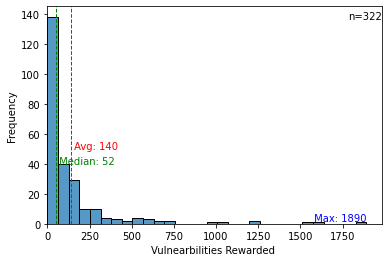

In [24]:
df = pd.read_excel("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/bugcrowd_modified_24.12.xlsx")
df,n = drop_nan(df, df["Vulnearbilities Rewarded"])

plot_histogram(df, "Vulnearbilities Rewarded","",n)

208 rows were dropped.
122 rows remaining.


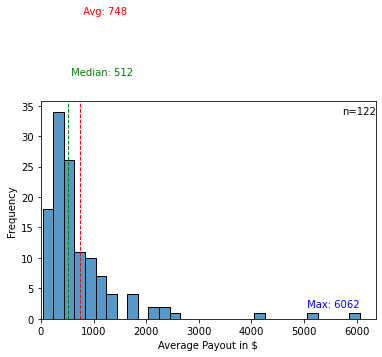

In [25]:
df = pd.read_excel("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/bugcrowd_modified_24.12.xlsx")
df,n = drop_nan(df, df["Average Payout"])
plot_histogram(df, "Average Payout", "in $",n)

0 rows were dropped.
330 rows remaining.


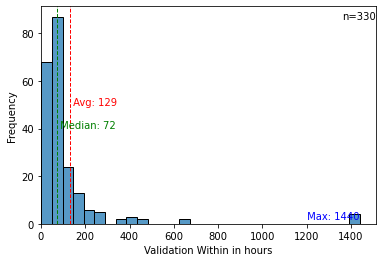

In [26]:
df = pd.read_excel("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/bugcrowd_modified_24.12.xlsx")
df,n = drop_nan(df, df["Validation Within"])
plot_histogram(df, "Validation Within", "in hours",n)

68 rows were dropped.
262 rows remaining.


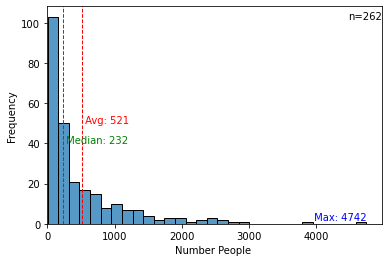

In [27]:
df = pd.read_excel("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/bugcrowd_modified_24.12.xlsx")
df,n = drop_nan(df, df["Number People"])
plot_histogram(df, "Number People", "",n)

103 rows were dropped.
227 rows remaining.


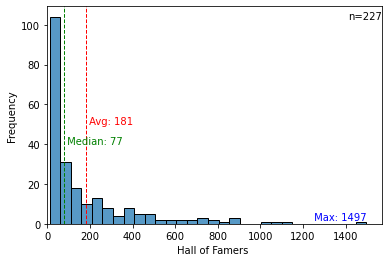

In [28]:

df = pd.read_excel("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/bugcrowd_modified_24.12.xlsx")
df,n = drop_nan(df, df["Hall of Famers"])
plot_histogram(df, "Hall of Famers", "",n)


### Safe habour

In [29]:
df = pd.read_excel("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/bugcrowd_modified_24.12.xlsx")
# Plot the counts using seaborn
df,n = drop_nan(df, df["Is Safe Harbor"])
counts = df["Is Safe Harbor"].value_counts()
count_n = counts.iloc[0] + counts.iloc[1]
dropped_columns = n - count_n




0 rows were dropped.
330 rows remaining.


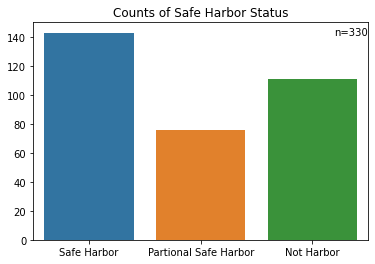

In [30]:
colors = [(0, 0, 1, 1), (0, 1, 0, 1), (1, 0, 0, 1)]
sns.barplot(x=["Safe Harbor", "Partional Safe Harbor", "Not Harbor"], y=[counts.iloc[0], counts.iloc[1], dropped_columns], data=df)
plt.title("Counts of Safe Harbor Status")
ax = plt.gca()
ax.text(1, 0.98, f"n={n}", horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)
plt.savefig("/Users/patrickahrend/Developer/data-analytics-bugcrowd/diagrams/histogram_safe_habor.png",facecolor="white", edgecolor="none")

----------------

## Average payout plotting

/var/folders/p8/j40fdn353n30l2nvsd_70qgc0000gn/T/ipykernel_20043/1731563499.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Average_payout"] = df["Average_payout"].str.replace("$", "").str.replace(",", "")


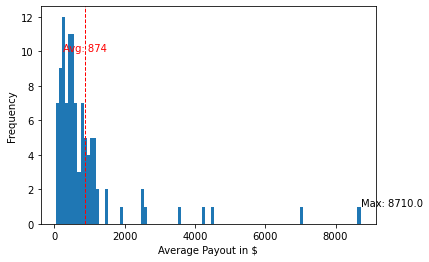

In [31]:
# read the CSV file into a DataFrame
df = pd.read_csv("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/BugCrowd-Program-V3.csv")

# remove the $ sign and the comma from the Average_payout column
df["Average_payout"] = df["Average_payout"].str.replace("$", "").str.replace(",", "")






# convert the Average_payout column to a numeric data type
df["Average_payout"] = pd.to_numeric(df["Average_payout"])
avg = df["Average_payout"].mean()

max_value = df["Average_payout"].max()
# create a histogram of the Average_payout column
df["Average_payout"].plot.hist(bins=100)

# label the x and y axes
plt.xlabel("Average Payout in $")
plt.ylabel("Frequency")

plt.text(max_value, 1, "Max: " + str(max_value))

plt.axvline(avg, color="r", linestyle="dashed", linewidth=1)
plt.text(avg, 10, "Avg: " + str(int(avg)), ha="center", color="r")

# save the figure as a PNG file
plt.savefig("/Users/patrickahrend/Developer/data-analytics-bugcrowd/diagrams/Average_payout.png")




## Num of white head hackers

Average number of hacks: 526


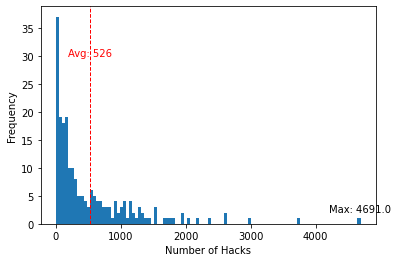

In [32]:
# read the CSV file into a DataFrame
df = pd.read_csv("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/BugCrowd-Program-V3.csv")


avg = df["Num_Hacks"].mean()

# print the average
print("Average number of hacks:", int(avg))

# convert the Num_Hacks column to a numeric data type
df["Num_Hacks"] = pd.to_numeric(df["Num_Hacks"])

# create a histogram of the Num_Hacks column
df["Num_Hacks"].plot.hist(bins=100)

# add a vertical line at the location of the average
plt.axvline(avg, color="r", linestyle="dashed", linewidth=1)
# label the x and y axes
plt.xlabel("Number of Hacks")
plt.ylabel("Frequency")
max_value = df["Num_Hacks"].max()
plt.text(max_value, 2, "Max: " + str(max_value),ha="center")

plt.text(avg, 30, "Avg: " + str(int(avg)), ha="center", color="r")

# save the figure as a PNG file
plt.savefig("/Users/patrickahrend/Developer/data-analytics-bugcrowd/diagrams/Num_hacks.png")




## Reward Average


Total count of values in the reward element column 176
Average reward in $: 3242
[2525.0, 5100.0, 1800.0, 5050.0, 5025.0, 2350.0, 10250.0, 5150.0, 1275.0, 2500.0, 662.5, 662.5, 1575.0, 3135.0, 1325.0, 1825.0, 1325.0, 2312.5, 6100.0, 5050.0, 25050.0, 5075.0, 5125.0, 10100.0, 800.0, 3100.0, 1250.0, 3050.0, 3100.0, 525.0, 5075.0, 1000.0, 1550.0, 3400.0, 3400.0, 3750.0, 2250.0, 2250.0, 1250.0, 1250.0, 2250.0, 1250.0, 1550.0, 2600.0, 1600.0, 1300.0, 12600.0, 3400.0, 3050.0, 4600.0, 3575.0, 15150.0, 2075.0, 3600.0, 1825.0, 3050.0, 3025.0, 2000.0, 2000.0, 850.0, 800.0, 1750.0, 675.0, 2600.0, 1275.0, 12625.0, 2100.0, 1325.0, 1325.0, 1575.0, 1325.0, 1800.0, 2525.0, 1325.0, 800.0, 2575.0, 2350.0, 1325.0, 800.0, 2550.0, 4250.0, 12550.0, 50000.0, 6100.0, 4800.0, 1250.0, 1550.0, 3050.0, 3050.0, 3050.0, 800.0, 1550.0, 2550.0, 1525.0, 2050.0, 2350.0, 1375.0, 1850.0, 2575.0, 4075.0, 1325.0, 1275.0, 5025.0, 2625.0, 625.0, 2500.0, 2550.0, 800.0, 5050.0, 2350.0, 3050.0, 2275.0, 1600.0, 1625.0, 1325.0, 13

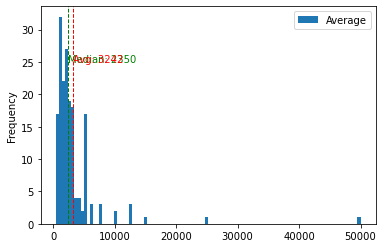

In [33]:
import csv 
import pandas as pd
# Open the CSV file
with open("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/BugCrowd-Program-V3.csv", 'r') as f:
  # Create a CSV reader
  reader = csv.reader(f)
  # Skip the header row
  next(reader)
  total_average = 0
  averages = []
  count = 0
  # Iterate over the rows of the CSV
  for row in reader:
    # Get the reward value from the current row
    reward_range = row[1]

    if reward_range == "":continue
    #Split the reward range on the "-" character
    if "-" in reward_range:
  # Split the string on the "-" character
      count += 1
      lower, upper = reward_range.split("-")
    else:
      # Assign the entire string to the lower variable
      lower = reward_range
      upper = None

    
    # Remove the "$" and "," characters from the strings
    lower = lower.replace("$", "").replace(",", "")
    upper = upper.replace("$", "").replace(",", "") if upper else None

    if "Points" in lower:
      lower = 0

    # Convert the strings to integers

    try :
      lower = int(lower)
      upper = int(upper) if upper else None
    except ValueError:
      print("ValueError", lower, upper)

      continue

    # Calculate the average of the lower and upper bounds
    if upper:
      average = (lower + upper) / 2
      total_average += average
      averages.append(average)
    else:
      average = lower
      total_average += average
      averages.append(average)


  print("Total count of values in the reward element column",count)  
  print("Average reward in $:", int(total_average / count))
  print(averages)
  df = pd.DataFrame(averages, columns=["Average"])
  df.plot.hist(bins=100)
  df_average = df["Average"].mean()
  df_median= df["Average"].median()
  print("this is the median",df_median)
  plt.axvline(df_median, color="g", linestyle="dashed", linewidth=1)
  plt.axvline(df_average, color="r", linestyle="dashed", linewidth=1)
  plt.text(df_median, 25, "Median: " + str(int(df_median)), color="g")
  plt.text(df_average, 25, "Avg: " + str(int(df_average)), color="r")









## Safe Habour Plotted

Safe Harbor: 111
Partial Safe Harbor: 68
Not Safe Harbor: 86


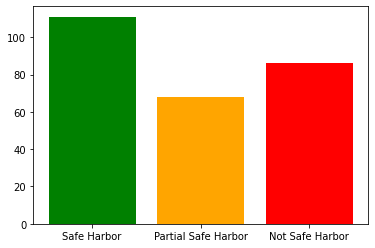

In [34]:
# Initialize lists to store the data
safe_harbor = []
partial_safe_harbor = []
not_safe_harbor = []

# Open the CSV file
with open("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/BugCrowd-Program-V3.csv", 'r') as f:
  # Create a CSV reader
  reader = csv.reader(f)
  
  # Iterate over the rows of the CSV
  for row in reader:
    # Get the "Is_Safe_harbor" value from the current row
    value = row[4]
    
    # Check the value and increment the appropriate list
    if value == "True":
      safe_harbor.append(1)
    elif "Partial safe harbor" in value:
      partial_safe_harbor.append(1)
    else:
      not_safe_harbor.append(1)

# Calculate the lengths of the lists
safe_harbor_count = len(safe_harbor)
print("Safe Harbor:", safe_harbor_count)
partial_safe_harbor_count = len(partial_safe_harbor)
print("Partial Safe Harbor:", partial_safe_harbor_count)
not_safe_harbor_count = len(not_safe_harbor)
print("Not Safe Harbor:", not_safe_harbor_count)

# Create the bar chart
plt.bar(["Safe Harbor", "Partial Safe Harbor", "Not Safe Harbor"], [safe_harbor_count, partial_safe_harbor_count, not_safe_harbor_count], color=["green", "orange", "red"])

# Show the chart
plt.show()


## Num hall of fame 

In [35]:
df = pd.read_excel("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/Bugcrowd_industry-asc_24.12.xlsx")

df = df_new["Hall_of_famers"]
df.dropna(inplace=True)

df = df.str.replace("View the hall", "").str.replace("View all ", "")

df = pd.to_numeric(df)
# create a histogram of the Num_Hacks column
df.plot.hist(bins=100)

average = df.mean()
average = int(average)
median = int(df.median())
# add a vertical line at the location of the average
plt.axvline(average, color="r", linestyle="dashed", linewidth=1)
plt.axvline(median, color="g", linestyle="dashed", linewidth=1)
plt.text(median, 20, "Median: " + str(median),ha="left",color="g")
# label the x and y axes
plt.xlabel("Number of Hacks")
plt.ylabel("Frequency")
plt.text(average, 15, "Max: " + str(average),ha="center",color="r")






KeyError: 'Hall_of_famers'

In [ ]:
df = df_new["Hall_of_famers"]
df.dropna(inplace=True)

for ele in df:
  if ele == "View the hall":
    df.replace(ele, 0, inplace=True)
    

df = pd.to_numeric(df)
# create a histogram of the Num_Hacks column
df.plot.hist(bins=100)

average = df.mean()
average = int(average)
# add a vertical line at the location of the average
plt.axvline(average, color="r", linestyle="dashed", linewidth=1)
# label the x and y axes
plt.xlabel("Number of Hacks")
plt.ylabel("Frequency")
plt.text(average, 15, "Max: " + str(average),ha="center",color="r")




## Validation within 

In [ ]:
df = pd.read_csv("/Users/patrickahrend/Developer/data-analytics-bugcrowd/data-octa/BugCrowd-Program-V3.csv")

df = df["Validation_within"]
df.dropna(inplace=True)
df.str.replace('\n', '').str.replace('days', '')

df_final = pd.DataFrame()

for ele in df:
    if "$" in ele:
        ele = ele.replace(ele, "0")
        ele = ele.strip()
    if "days" in ele:
        ele = ele.replace("days", "")
        ele = ele.strip()
        ele = int(ele)
        ele = ele * 24
        ele = str(ele) + " hours"
    if "day" in ele:
        ele = ele.replace("day", "")
        ele = ele.strip()
        ele = int(ele)
        ele = ele * 24
        ele = str(ele) + " hours"
    if "about" in ele:
        ele = ele.replace("about", "")
        ele = ele.strip()
    if "month" in ele:
        ele = ele.replace("month", "")
        ele = ele.strip()
        ele = int(ele)
        ele = ele * 24 * 30
        ele = str(ele) + " hours"
    if "minutes" in ele:
        ele = ele.replace("minutes", "")
        ele = ele.strip()
        ele = int(ele)
        ele = ele * 60
        ele = str(ele) + " hours"
    if "hours" in ele:
        ele = ele.replace("hours", "")
        ele = ele.strip()
    if "hour" in ele:
        ele = ele.replace("hour", "")
        ele = ele.strip()
    
    df_final = df_final.append({'Validation_within': ele}, ignore_index=True)

df_final = pd.to_numeric(df_final["Validation_within"])
df_final.plot.hist(bins=100)
average = df_final.mean()
average = int(average)
# add a vertical line at the location of the average
plt.axvline(average, color="r", linestyle="dashed", linewidth=1)
# label the x and y axes
plt.xlabel("Number of Hours")
plt.ylabel("Frequency")
plt.text(average, 35, "Avg: " + str(average),ha="center",color="r")
    





# df['Validation_within'] = df['Validation_within'].str.replace('\n', '').str.replace('days', '')
# # Extract the numerical values from the entries
# df['Validation_within'] = df['Validation_within'].str.extract('(\d+)')

# # Convert the column to numeric type
# df['Validation_within'] = pd.to_numeric(df['Validation_within'])

# for element in df['Validation_within']:
#     print(element)


# df_new = pd.DateFrame("Validation_within" , columns=["Validation_within"])
# df.dropna(inplace=True)
# print(type(df))

## Scope Target Mobile

## Scope Target Android, IOS